In [10]:
! pip install qeds fiona geopandas gensim folium pyLDAvis descartes
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds

In [11]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [41]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


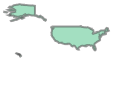

In [13]:
world.loc["USA",'geometry']

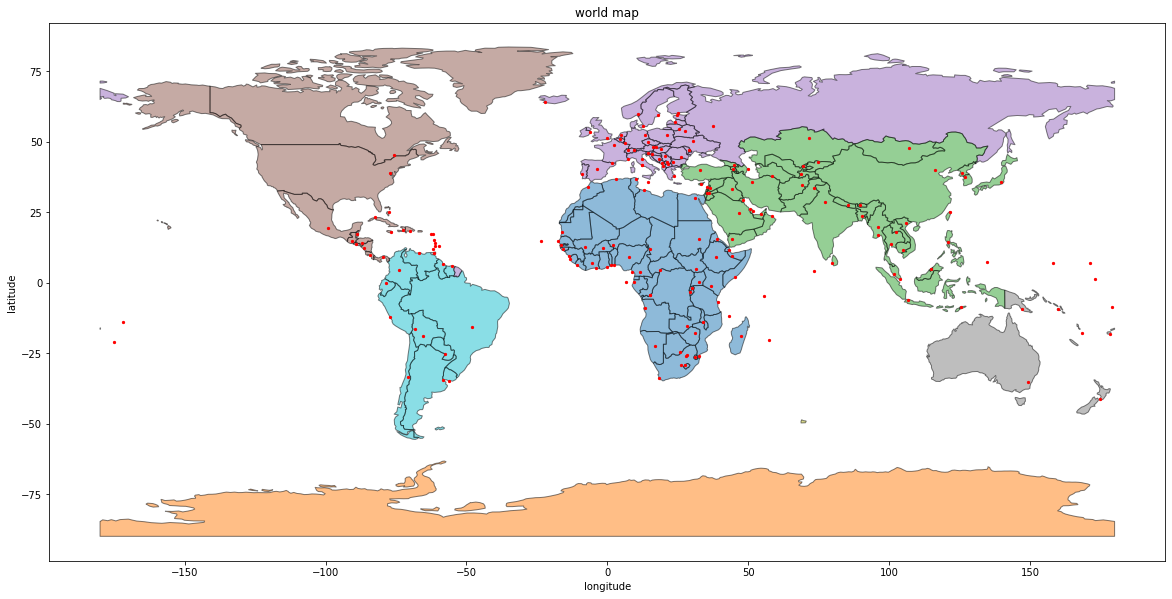

In [58]:
fig, gax = plt.subplots(figsize=(20,20))

world.plot(column = "continent", ax=gax, edgecolor='black', alpha = 0.5)

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.set_title('world map')

cities.plot(ax=gax, color='red', alpha = 1, markersize=5)

gax.spines['top'].set_visible(True)
gax.spines['right'].set_visible(True)

plt.show()



In [59]:
! pip install bokeh

In [60]:
import bokeh

In [69]:
import numpy as np

np.random.seed(123)
# df = pd.DataFrame({"holding": np.random.randint(0, 200, 1),
#                    "nums": ["23", "24", "18", "14", np.nan, "XYZ", "35"],
#                    "colors": ["green", "red", "yellow", "orange", "purple", "blue", "pink"],
#                    "other_column": np.random.randint(0, 200, 1)})

# df1 = pd.DataFrame(
#     np.random.randint(0, 100, size=(10, 4)),
#     columns=["a", "b", "c", "d"]
# )


housing = pd.DataFrame(
    np.random.randint(50000, 100000, size=(100, 1)),
    columns=["price"])


housing["longitude"] = np.random.uniform(-180, 180, size = (100,))

housing["latitude"] = np.random.uniform(-90, 90, size = (100,))

housing["geometry"] = [Point(xy) for xy in zip(housing["longitude"], housing["latitude"])]
# (housing["longitude"]) + "," + str(housing["latitude"])

geo_housing = gpd.GeoDataFrame(housing,
                               geometry = "geometry")     


geo_housing.head()

,price,longitude,latitude,geometry
0,65725,-92.280105,76.963784,POINT (-92.28011 76.96378)
1,78030,-110.079734,45.129060,POINT (-110.07973 45.12906)
2,67730,26.084505,13.331489,POINT (26.08450 13.33149)
3,65377,-145.543494,45.295918,POINT (-145.54349 45.29592)
4,57763,138.717657,-75.753187,POINT (138.71766 -75.75319)


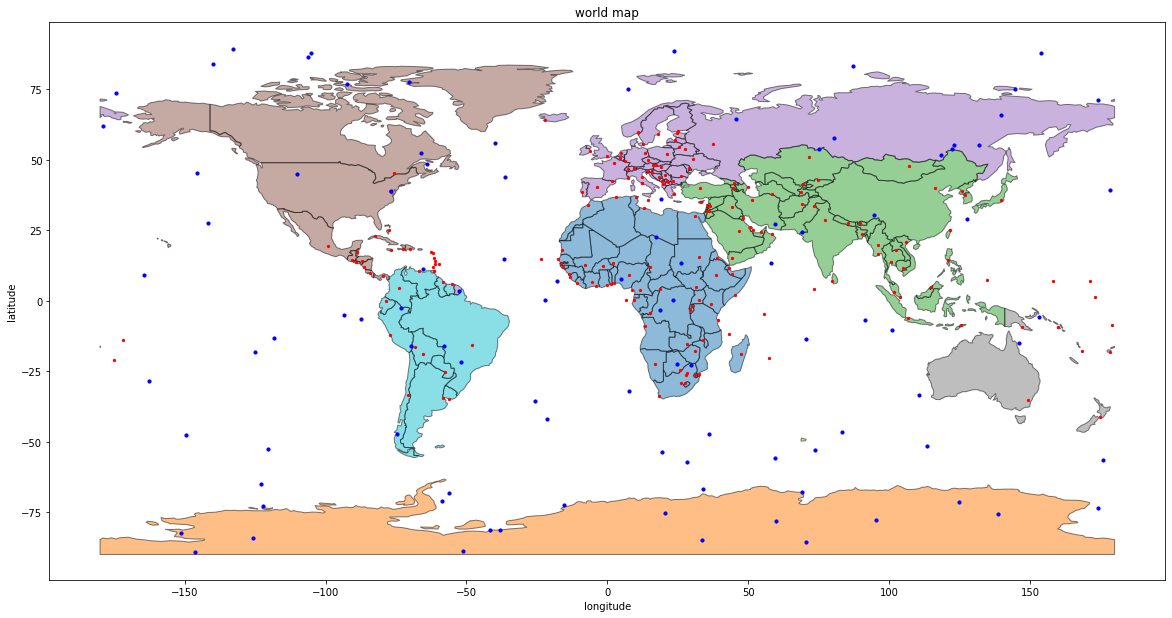

In [73]:
fig, gax = plt.subplots(figsize=(20,20))

world.plot(column = "continent", ax=gax, edgecolor='black', alpha = 0.5)

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.set_title('world map')

cities.plot(ax=gax, color='red', alpha = 1, markersize=5)

gax.spines['top'].set_visible(True)
gax.spines['right'].set_visible(True)

geo_housing.plot(ax = gax, color='blue', alpha = 1, markersize=10)

plt.show()

In [76]:
import math
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

In [77]:
# Input geojson source that contains features for plotting for:
# initial year 2018 and initial criteria sale_price_median
geosource = GeoJSONDataSource(geojson = json_data(2018))
input_field = 'sale_price_median'

# Define a sequential multi-hue color palette.
palette = brewer['Blues'][8]

# Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

# Add hover tool
hover = HoverTool(tooltips = [ ('Neighborhood','@neighborhood_name'),
                               ('# Sales', '@sale_price_count'),
                               ('Average Price', '$@sale_price_mean{,}'),
                               ('Median Price', '$@sale_price_median{,}'),
                               ('Average SF', '@sf_mean{,}'),
                               ('Price/SF ', '$@price_sf_mean{,}'),
                               ('Income Needed', '$@min_income{,}')])

# Call the plotting function
p = make_plot(input_field)

# Make a slider object: slider 
slider = Slider(title = 'Year',start = 2009, end = 2018, step = 1, value = 2018)
slider.on_change('value', update_plot)

# Make a selection object: select
select = Select(title='Select Criteria:', value='Median Sales Price', options=['Median Sales Price', 'Minimum Income Required',
                                                                               'Average Sales Price', 'Average Price Per Square Foot',
                                                                               'Average Square Footage', 'Number of Sales'])
select.on_change('value', update_plot)

# Make a column layout of widgetbox(slider) and plot, and add it to the current document
# Display the current document
layout = column(p, widgetbox(select), widgetbox(slider))
curdoc().add_root(layout)

NameError: name 'json_data' is not defined